Loan Eligibility prediction using Machine Learning Models in Python

Have you ever thought about the apps that can predict whether you will get your loan approved or not? In this Project, we are going to develop one such model that can predict whether a person will get his/her loan approved or not by using some of the background information of the applicant like the applicant’s gender, marital status, income, etc.



Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings('ignore')

Loading Dataset

In [3]:
df = pd.read_csv(r"C:\Users\rajni\Downloads\loan_data.csv")
df.head()

,Loan_ID,Gender,Married,ApplicantIncome,LoanAmount,Loan_Status
0,LP001002,Male,No,5849,NaN,Y
1,LP001003,Male,Yes,4583,128.0,N
2,LP001005,Male,Yes,3000,66.0,Y
3,LP001006,Male,Yes,2583,120.0,Y
4,LP001008,Male,No,6000,141.0,Y


In [9]:
df.shape

(598, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Loan_ID          598 non-null    object 
 1   Gender           598 non-null    object 
 2   Married          598 non-null    object 
 3   ApplicantIncome  598 non-null    int64  
 4   LoanAmount       577 non-null    float64
 5   Loan_Status      598 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 28.2+ KB


To get values like the mean, count and min of the column we can use describe() method.

In [11]:
df.describe()

,ApplicantIncome,LoanAmount
count,598.000000,577.000000
mean,5292.252508,144.968804
std,5807.265364,82.704182
min,150.000000,9.000000
25%,2877.500000,100.000000
50%,3806.000000,127.000000
75%,5746.000000,167.000000
max,81000.000000,650.000000


Exploratory Data Analysis

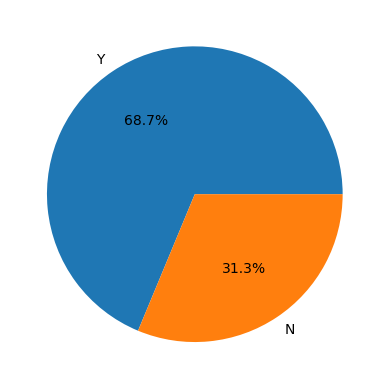

In [13]:
temp = df['Loan_Status'].value_counts()
plt.pie(temp.values,
        labels=temp.index,
        autopct='%1.1f%%')
plt.show()

Here we have an imbalanced dataset. We will have to balance it before training any model on this data.

We specify the DataFrame df as the data source for the sb.countplot() function. The x parameter is set to the column name from which the count plot is to be created, and hue is set to ‘Loan_Status’ to create count bars based on the ‘Loan_Status’ categories.

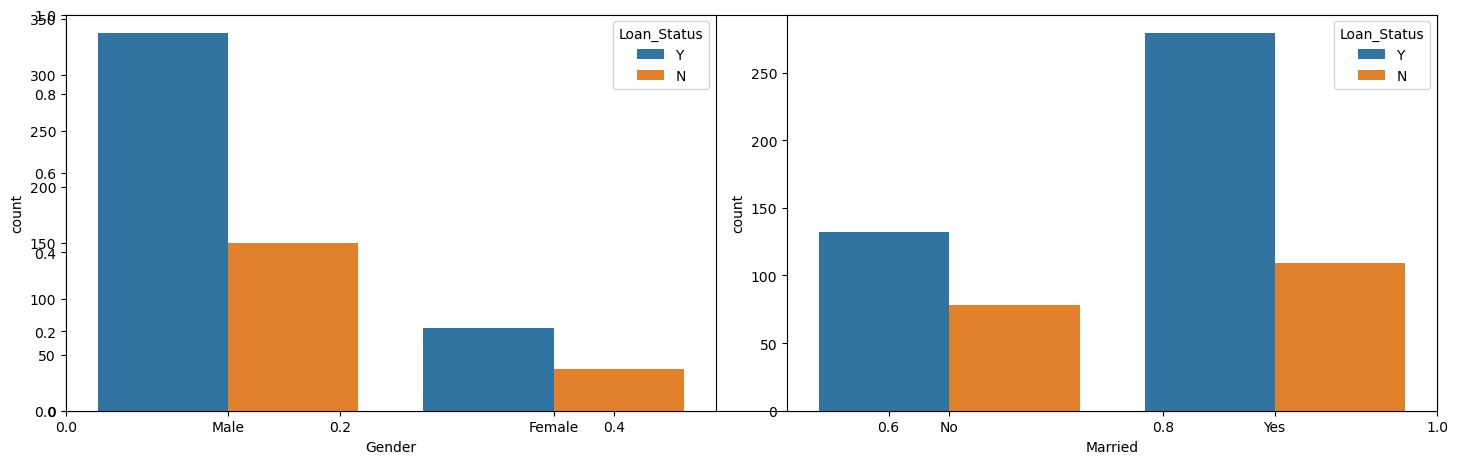

In [15]:
plt.subplots(figsize=(15, 5))
for i, col in enumerate(['Gender', 'Married']):
    plt.subplot(1, 2, i+1)
    sb.countplot(data=df, x=col, hue='Loan_Status')
plt.tight_layout()
plt.show()

One of the main observations we can draw here is that the chances of getting a loan approved for married people are quite low compared to those who are not married.


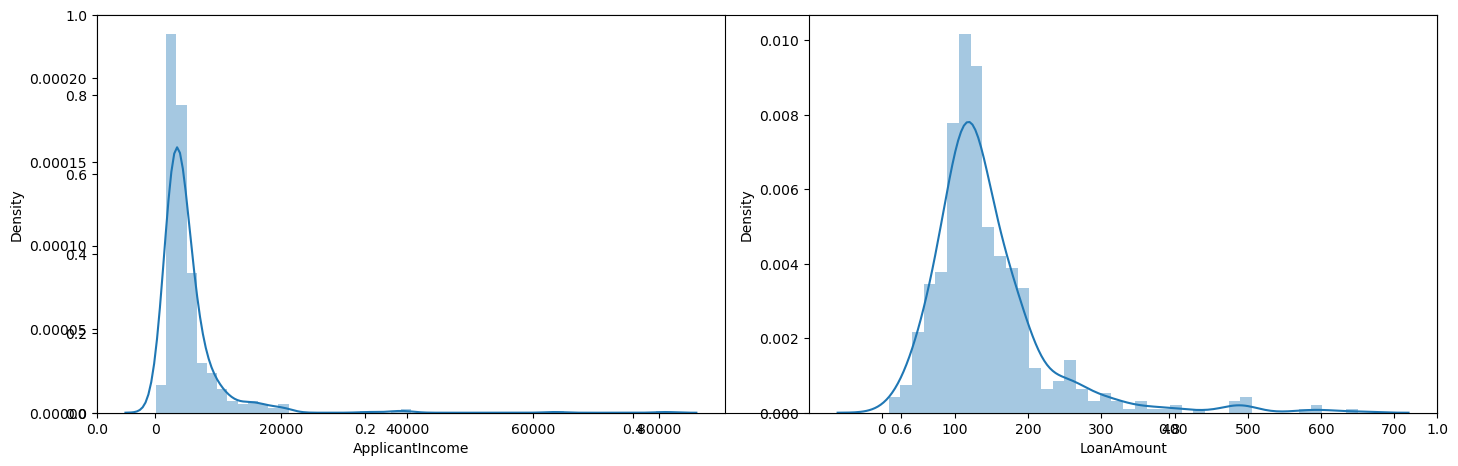

In [17]:
plt.subplots(figsize=(15, 5))
for i, col in enumerate(['ApplicantIncome', 'LoanAmount']):
    plt.subplot(1, 2, i+1)
    sb.distplot(df[col])
plt.tight_layout()
plt.show()

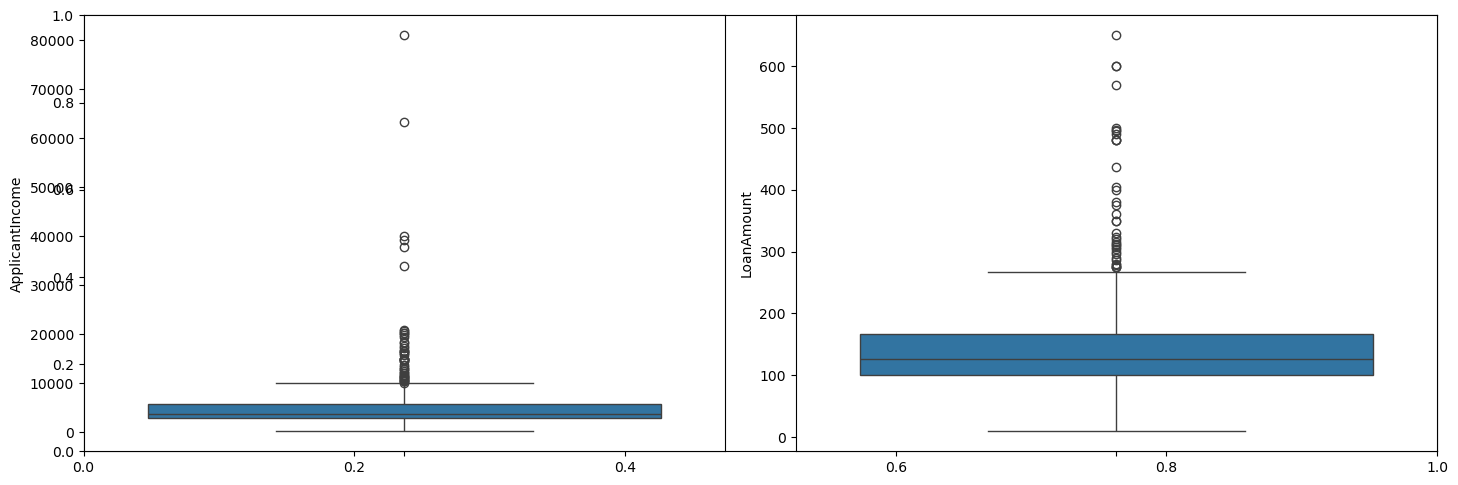

In [19]:
plt.subplots(figsize=(15, 5))
for i, col in enumerate(['ApplicantIncome', 'LoanAmount']):
    plt.subplot(1, 2, i+1)
    sb.boxplot(df[col])
plt.tight_layout()
plt.show()

There are some extreme outlier’s in the data we need to remove them.

In [21]:
df = df[df['ApplicantIncome'] < 25000]
df = df[df['LoanAmount'] < 400000]

Let’s see the mean amount of the loan granted to males as well as females. For that, we will use groupyby() method.


In [23]:
df.groupby('Gender').mean(numeric_only=True)['LoanAmount']


Gender
Female    126.697248
Male      146.872294
Name: LoanAmount, dtype: float64

The loan amount requested by males is higher than what is requested by females.

In [25]:
df.groupby(['Married', 'Gender']).mean(numeric_only=True)['LoanAmount']


Married  Gender
No       Female    116.115385
         Male      135.959677
Yes      Female    153.322581
         Male      150.875740
Name: LoanAmount, dtype: float64

Here is one more interesting observation in addition to the previous one that the married people requested loan amount is generally higher than that of the unmarried. This may be one of the reason’s that we observe earlier that the chances of getting loan approval for a married person are lower than that compared to an unmarried person.

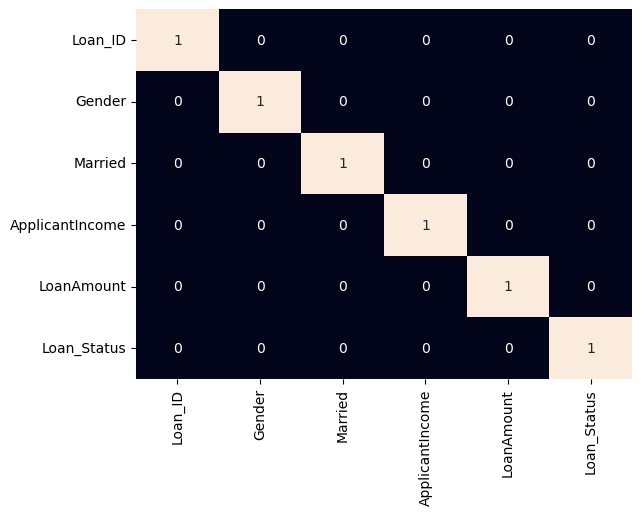

In [27]:
# Function to apply label encoding
def encode_labels(data):
    for col in data.columns:
        if data[col].dtype == 'object':
            le = LabelEncoder()
            data[col] = le.fit_transform(data[col])

    return data

# Applying function in whole column
df = encode_labels(df)

# Generating Heatmap
sb.heatmap(df.corr() > 0.8, annot=True, cbar=False)
plt.show()

Data Preprocessing
In this step, we will split the data for training and testing. After that, we will preprocess the training data

In [29]:
features = df.drop('Loan_Status', axis=1) 
target = df['Loan_Status'].values 

X_train, X_val,    Y_train, Y_val = train_test_split(features, target, 
                                    test_size=0.2, 
                                    random_state=10) 

# As the data was highly imbalanced we will balance 
# it by adding repetitive rows of minority class. 
ros = RandomOverSampler(sampling_strategy='minority', 
                        random_state=0) 
X, Y = ros.fit_resample(X_train, Y_train) 

X_train.shape, X.shape

((456, 5), (638, 5))

We will now use Standard scaling for normalizing the data

In [31]:
# Normalizing the features for stable and fast training.
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_val = scaler.transform(X_val)

Model Development

In [33]:
from sklearn.metrics import roc_auc_score
model = SVC(kernel='rbf')
model.fit(X, Y)

print('Training Accuracy : ', metrics.roc_auc_score(Y, model.predict(X)))
print('Validation Accuracy : ', metrics.roc_auc_score(Y_val, model.predict(X_val)))
print()

Training Accuracy :  0.6300940438871474
Validation Accuracy :  0.48198198198198194



Model Evaluation
Model Evaluation can be done using confusion matrix.

we first train the SVC model using the training data X and Y. Then, we calculate the ROC AUC scores for both the training and validation datasets. The confusion matrix is built for the validation data by using the confusion_matrix function from sklearn.metrics. Finally, we plot the confusion matrix using the plot_confusion_matrix function from the sklearn.metrics.plot_confusion_matrix submodule.

In [35]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
training_roc_auc = roc_auc_score(Y, model.predict(X))
validation_roc_auc = roc_auc_score(Y_val, model.predict(X_val))
print('Training ROC AUC Score:', training_roc_auc)
print('Validation ROC AUC Score:', validation_roc_auc)
print()
cm = confusion_matrix(Y_val, model.predict(X_val))

Training ROC AUC Score: 0.6300940438871474
Validation ROC AUC Score: 0.48198198198198194



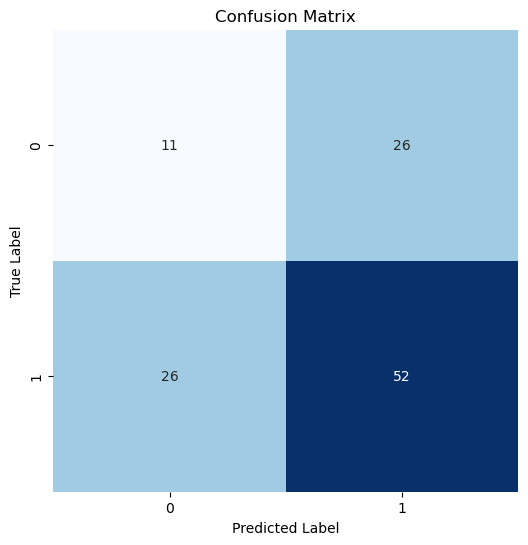

In [37]:
plt.figure(figsize=(6, 6))
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [39]:
from sklearn.metrics import classification_report
print(classification_report(Y_val, model.predict(X_val)))

              precision    recall  f1-score   support

           0       0.30      0.30      0.30        37
           1       0.67      0.67      0.67        78

    accuracy                           0.55       115
   macro avg       0.48      0.48      0.48       115
weighted avg       0.55      0.55      0.55       115



Conclusion
As this dataset contains fewer features the performance of the model is not up to the mark maybe if we will use a better and big dataset we will be able to achieve better accuracy. 